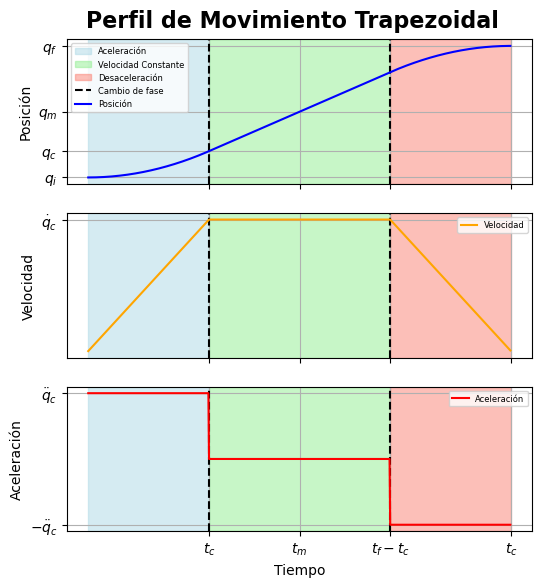

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Definir perfil trapezoidal
def perfil_trapezoidal(v_max, a_max, distancia, dt=0.01):
    t_acel = v_max / a_max  
    d_acel = 0.5 * a_max * t_acel**2  

    if 2 * d_acel > distancia:
        raise ValueError("Distancia muy corta para alcanzar v_max. Reduce v_max o aumenta la distancia.")

    d_const = distancia - 2 * d_acel  
    t_const = d_const / v_max  
    t_total = 2 * t_acel + t_const  
    t_m = t_total / 2  # 🔥 Nuevo: Tiempo Medio

    t = np.arange(0, t_total, dt)
    q = np.zeros_like(t)
    qd = np.zeros_like(t)
    qdd = np.zeros_like(t)

    for i in range(len(t)):
        if t[i] < t_acel:  
            qdd[i] = a_max
            qd[i] = a_max * t[i]
            q[i] = 0.5 * a_max * t[i]**2
        elif t[i] < t_acel + t_const:  
            qdd[i] = 0
            qd[i] = v_max
            q[i] = d_acel + v_max * (t[i] - t_acel)
        else:  
            t_d = t[i] - (t_acel + t_const)
            qdd[i] = -a_max
            qd[i] = v_max - a_max * t_d
            q[i] = d_acel + d_const + (v_max * t_d - 0.5 * a_max * t_d**2)

    return t, q, qd, qdd, t_acel, t_acel + t_const, t_total, t_m  # 🔥 Se devuelve t_m

# Parámetros
v_max = 2.0  
a_max = 1.0  
distancia = 10  

# Generar perfil
t, q, qd, qdd, t_acel, t_const, t_total, t_m = perfil_trapezoidal(v_max, a_max, distancia)

# Graficar los resultados
fig, axs = plt.subplots(3, 1, figsize=(6,6), sharex=True)

# Colorear regiones
axs[0].axvspan(0, t_acel, color='lightblue', alpha=0.5, label="Aceleración")
axs[0].axvspan(t_acel, t_const, color='lightgreen', alpha=0.5, label="Velocidad Constante")
axs[0].axvspan(t_const, t_total, color='salmon', alpha=0.5, label="Desaceleración")

axs[1].axvspan(0, t_acel, color='lightblue', alpha=0.5)
axs[1].axvspan(t_acel, t_const, color='lightgreen', alpha=0.5)
axs[1].axvspan(t_const, t_total, color='salmon', alpha=0.5)

axs[2].axvspan(0, t_acel, color='lightblue', alpha=0.5)
axs[2].axvspan(t_acel, t_const, color='lightgreen', alpha=0.5)
axs[2].axvspan(t_const, t_total, color='salmon', alpha=0.5)

# Líneas verticales de referencia
axs[0].axvline(x=t_acel, color='black', linestyle='--', label="Cambio de fase")
axs[0].axvline(x=t_const, color='black', linestyle='--')

axs[1].axvline(x=t_acel, color='black', linestyle='--')
axs[1].axvline(x=t_const, color='black', linestyle='--')

axs[2].axvline(x=t_acel, color='black', linestyle='--')
axs[2].axvline(x=t_const, color='black', linestyle='--')

# Graficar datos
axs[0].plot(t, q, label="Posición", color='blue')
axs[0].set_ylabel("Posición")
axs[0].legend(fontsize=6)
axs[0].grid()

q_i = min(q)  # Valor inicial de la trayectoria
q_f = max(q)  # Valor final de la trayectoria
q_c = np.interp(t_acel, t, q)
q_m = np.interp(t_m, t, q) # Otro punto de referencia (ajústalo si es necesario)

axs[0].set_yticks([q_i, q_c, q_m, q_f])
axs[0].set_yticklabels([r"$q_i$", r"$q_c$", r"$q_m$", r"$q_f$"])

axs[1].plot(t, qd, label="Velocidad", color='orange')
axs[1].set_ylabel("Velocidad")
axs[1].legend(fontsize=6)
axs[1].grid()

# 🔹 Marcar referencias en el eje Y (Velocidad)
axs[1].set_yticks([v_max])
axs[1].set_yticklabels([r"$\dot{q}_{c}$"])

axs[2].plot(t, qdd, label="Aceleración", color='red')
axs[2].set_xlabel("Tiempo")
axs[2].set_ylabel("Aceleración")
axs[2].legend(fontsize=6)
axs[2].grid()

# 🔹 Marcar referencias en el eje Y (Aceleración)
axs[2].set_yticks([-a_max, a_max])
axs[2].set_yticklabels([r"$-\ddot{q}_{c}$", r"$\ddot{q}_{c}$"])

# Agregar referencias en el eje X
axs[-1].set_xticks([t_acel, t_const, t_m, t_total])
axs[-1].set_xticklabels([r'$t_{c}$', r'$t_{f} - t_{c}$', r'$t_m$', r'$t_{c}$'])


plt.suptitle("Perfil de Movimiento Trapezoidal", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.93)
plt.show()


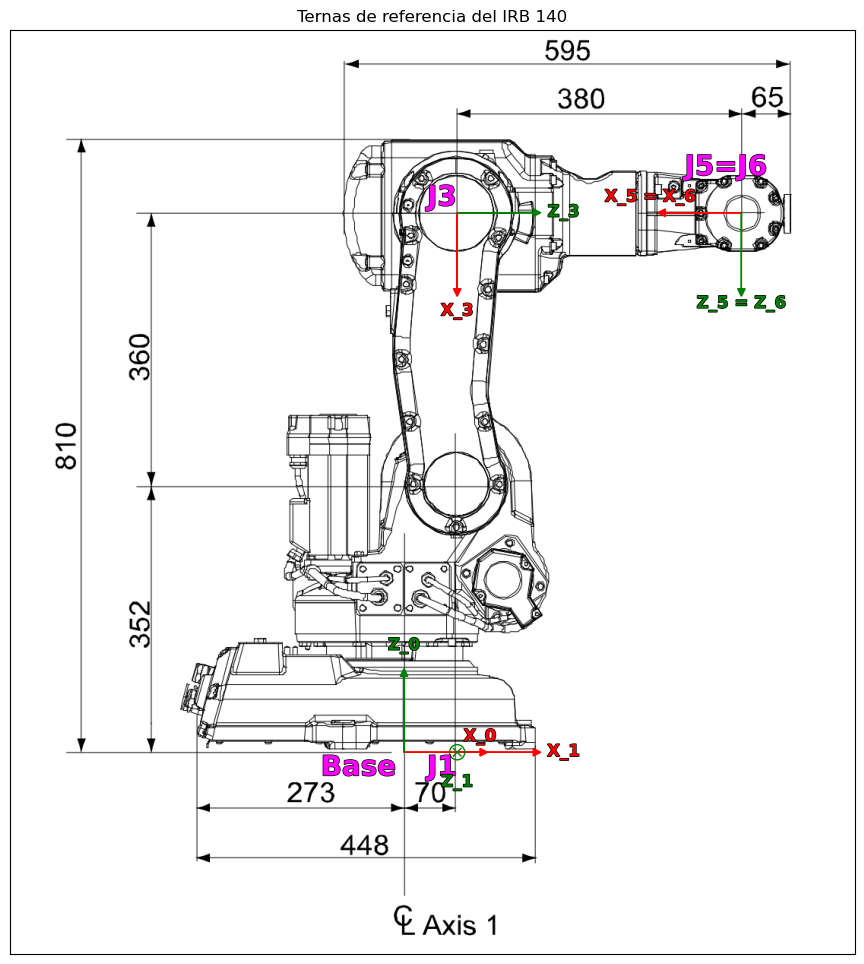

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects  # Importar efectos de trazo

# Cargar la imagen del IRB 140
image_path = "irb140.png"  # Asegúrate de tener la imagen en la misma carpeta
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB

# Tamaño del círculo base para ambos vectores
tamano_circulo = 20

# Tamaño de los elementos internos
tamano_punto = tamano_circulo / 3
tamano_cruz = tamano_circulo / 2


# Crear figura
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(image)
ax.set_xticks([])  # Quitar ejes
ax.set_yticks([])

# Definir escala de los vectores
scale = 100

# Función para agregar texto con borde negro
def draw_text_with_border(ax, x, y, text, color="magenta", fontsize=20, fontweight="bold"):
    txt = ax.text(x, y, text, fontsize=fontsize, color=color, fontweight=fontweight, ha="center", va="center")
    txt.set_path_effects([path_effects.withStroke(linewidth=1, foreground='darkgray')])  # Contorno negro

# Base
base = {"Base": (518, 950)}
for joint, (x, y) in base.items():
    ax.arrow(x, y, scale, 0, head_width=10, head_length=10, fc='r', ec='r')  # Eje X (rojo)
    ax.arrow(x, y, 0, -scale, head_width=10, head_length=10, fc='g', ec='g')  # Eje Y (verde)

    # Etiquetas con borde negro
    draw_text_with_border(ax, x - 60, y + 20, joint)
    draw_text_with_border(ax, x + (scale), y - 20 , "X_0", color="red", fontsize=12)
    draw_text_with_border(ax, x, y - (scale + 40), "Z_0", color="green", fontsize=12)

J1 = {"J1": (588, 950)}
for joint, (x, y) in J1.items():
    ax.arrow(x, y, scale, 0, head_width=10, head_length=10, fc='r', ec='r')  # Eje X (rojo)
    #ax.arrow(x, y, 0, -scale, head_width=10, head_length=10, fc='g', ec='g')  # Eje Y (verde)
    # Dibujar el vector entrando (círculo con cruz)
    circulo_entrando = plt.Circle((x, y), radius=tamano_circulo / 2, fill=False, edgecolor='green')

    # Líneas de la cruz
    linea1_entrando = plt.Line2D(
        (x - tamano_cruz / 2, x + tamano_cruz / 2),
        (y - tamano_cruz / 2, y + tamano_cruz / 2),
        color='green', linewidth=1
    )
    linea2_entrando = plt.Line2D(
        (x - tamano_cruz / 2, x + tamano_cruz / 2),
        (y + tamano_cruz / 2, y - tamano_cruz / 2),
        color='green', linewidth=1
    )

    ax.add_patch(circulo_entrando)
    ax.add_line(linea1_entrando)
    ax.add_line(linea2_entrando)

    # Etiquetas con borde negro
    draw_text_with_border(ax, x - 20, y + 20, joint)
    draw_text_with_border(ax, x + (scale + 40), y, "X_1", color="red", fontsize=12)
    draw_text_with_border(ax, x, y + 40, "Z_1", color="green", fontsize=12)

# J3
J3 = {"J3": (588, 240)}
for joint, (x, y) in J3.items():
    ax.arrow(x, y, 0, scale, head_width=10, head_length=10, fc='r', ec='r')  # Eje X (rojo)
    ax.arrow(x, y, scale, 0, head_width=10, head_length=10, fc='g', ec='g')  # Eje Y (verde)

    draw_text_with_border(ax, x - 20, y - 20, joint)
    draw_text_with_border(ax, x, y + (scale + 30), "X_3", color="red", fontsize=12)
    draw_text_with_border(ax, x + (scale + 40), y, "Z_3", color="green", fontsize=12)

# J5=J6
J56 = {"J5=J6": (962, 240)}
for joint, (x, y) in J56.items():
    ax.arrow(x, y, -scale, 0, head_width=10, head_length=10, fc='r', ec='r')  # Eje X (rojo)
    ax.arrow(x, y, 0, scale, head_width=10, head_length=10, fc='g', ec='g')  # Eje Y (verde)

    draw_text_with_border(ax, x - 20, y - 60, joint)
    draw_text_with_border(ax, x - (scale + 20), y - 20, "X_5 = X_6", color="red", fontsize=12)
    draw_text_with_border(ax, x, y + (scale + 20), "Z_5 = Z_6", color="green", fontsize=12)

# J4
J4 = {"J4": (962, 950)}


plt.title("Ternas de referencia del IRB 140")
plt.show()


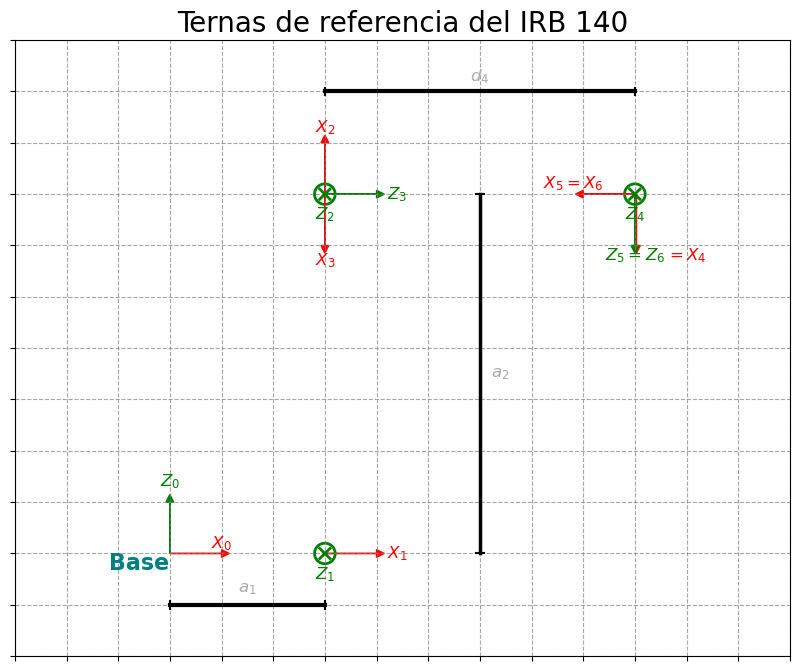

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Crear figura sin imagen de fondo
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(0, 1500)  # Ajusta según el rango que necesites
ax.set_ylim(0, 1200)
ax.set_facecolor('white')  # Fondo blanco

# Acá seteamos ticks manualmente para que matplotlib tenga puntos donde dibujar la grilla
ax.set_xticks(range(0, 1501, 100))  # cada 100 mm
ax.set_yticks(range(0, 1201, 100))

ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)

# Borrar los números
ax.set_xticklabels([])
ax.set_yticklabels([])

# Tamaño de los vectores
scale = 100
tamano_circulo = 40
tamano_punto = tamano_circulo / 3
tamano_cruz = tamano_circulo / 2

# Función para dibujar texto con borde negro
def draw_text_with_border(ax, x, y, text, color="magenta", fontsize=16, fontweight="bold"):
    txt = ax.text(x, y, text, fontsize=fontsize, color=color, fontweight=fontweight, ha="center", va="center")
    #txt.set_path_effects([path_effects.withStroke(linewidth=1.5, foreground='black')])

# --- Dibujar las ternas ---

# Base
base = {"Base": (300, 1000)}
for joint, (x, y) in base.items():
    ax.arrow(x, y, scale, 0, head_width=15, head_length=15, fc='r', ec='r')  # Eje X rojo
    ax.arrow(x, y, 0, -scale, head_width=15, head_length=15, fc='g', ec='g')  # Eje Y verde

    draw_text_with_border(ax, x - 60, y + 20, joint, color='teal')
    draw_text_with_border(ax, x + scale, y - 20, r'$X_0$', color="red", fontsize=12)
    draw_text_with_border(ax, x, y - (scale + 40), r'$Z_0$', color="green", fontsize=12)

# J1
J1 = {"J1": (600, 1000)}
for joint, (x, y) in J1.items():
    ax.arrow(x, y, scale, 0, head_width=15, head_length=15, fc='r', ec='r')  # Eje X rojo

    # Dibujar vector Z "entrando" (círculo y cruz)
    circulo_entrando = plt.Circle((x, y), radius=tamano_circulo / 2, fill=False, edgecolor='green', linewidth=2)
    linea1 = plt.Line2D((x - tamano_cruz / 2, x + tamano_cruz / 2), (y - tamano_cruz / 2, y + tamano_cruz / 2), color='green', linewidth=2)
    linea2 = plt.Line2D((x - tamano_cruz / 2, x + tamano_cruz / 2), (y + tamano_cruz / 2, y - tamano_cruz / 2), color='green', linewidth=2)

    ax.add_patch(circulo_entrando)
    ax.add_line(linea1)
    ax.add_line(linea2)

    #draw_text_with_border(ax, x - 20, y - 40, joint)
    draw_text_with_border(ax, x + (scale + 40), y, r'$X_1$', color="red", fontsize=12)
    draw_text_with_border(ax, x, y + 40, r'$Z_1$', color="green", fontsize=12)

J2 = {"J2": (600, 300)}
for joint, (x, y) in J2.items():
    ax.arrow(x, y, 0, -scale, head_width=15, head_length=15, fc='r', ec='r')  # Eje X rojo
    # Dibujar vector Z "entrando" (círculo y cruz)
    circulo_entrando = plt.Circle((x, y), radius=tamano_circulo / 2, fill=False, edgecolor='green', linewidth=2)
    linea1 = plt.Line2D((x - tamano_cruz / 2, x + tamano_cruz / 2), (y - tamano_cruz / 2, y + tamano_cruz / 2), color='green', linewidth=2)
    linea2 = plt.Line2D((x - tamano_cruz / 2, x + tamano_cruz / 2), (y + tamano_cruz / 2, y - tamano_cruz / 2), color='green', linewidth=2)

    ax.add_patch(circulo_entrando)
    ax.add_line(linea1)
    ax.add_line(linea2)

    #draw_text_with_border(ax, x + 40, y - 20, joint)
    draw_text_with_border(ax, x, y - (scale + 30), r'$X_2$', color="red", fontsize=12)
    draw_text_with_border(ax, x, y + 40, r'$Z_2$', color="green", fontsize=12)

# J3
J3 = {"J3": (600, 300)}
for joint, (x, y) in J3.items():
    ax.arrow(x, y, 0, scale, head_width=15, head_length=15, fc='r', ec='r')  # Eje X rojo
    ax.arrow(x, y, scale, 0, head_width=15, head_length=15, fc='g', ec='g')  # Eje Y verde

    #draw_text_with_border(ax, x - 40, y - 20, joint)
    draw_text_with_border(ax, x, y + (scale + 30), r'$X_3$', color="red", fontsize=12)
    draw_text_with_border(ax, x + (scale + 40), y, r'$Z_3$', color="green", fontsize=12)

J4 = {"J4": (1200, 300)}
for joint, (x, y) in J4.items():
    ax.arrow(x+3, y, 0, scale, head_width=15, head_length=15, fc='r', ec='r')  # Eje X rojo
    # Dibujar vector Z "entrando" (círculo y cruz)
    circulo_entrando = plt.Circle((x, y), radius=tamano_circulo / 2, fill=False, edgecolor='green', linewidth=2)
    linea1 = plt.Line2D((x - tamano_cruz / 2, x + tamano_cruz / 2), (y - tamano_cruz / 2, y + tamano_cruz / 2), color='green', linewidth=2)
    linea2 = plt.Line2D((x - tamano_cruz / 2, x + tamano_cruz / 2), (y + tamano_cruz / 2, y - tamano_cruz / 2), color='green', linewidth=2)

    ax.add_patch(circulo_entrando)
    ax.add_line(linea1)
    ax.add_line(linea2)

    #draw_text_with_border(ax, x + 40, y - 20, joint)
    draw_text_with_border(ax, x + 100, y + (scale + 20), r'$=X_4$', color="red", fontsize=12)
    draw_text_with_border(ax, x, y + 40, r'$Z_4$', color="green", fontsize=12)

# J5=J6
J56 = {"J5=J6": (1200, 300)}
for joint, (x, y) in J56.items():
    ax.arrow(x, y, -scale, 0, head_width=15, head_length=15, fc='r', ec='r')  # Eje X rojo
    ax.arrow(x, y, 0, scale, head_width=15, head_length=15, fc='g', ec='g')  # Eje Y verde

    #draw_text_with_border(ax, x + 20, y - 30, joint)
    draw_text_with_border(ax, x - (scale + 20), y - 20, r'$X_5=X_6$', color="red", fontsize=12)
    draw_text_with_border(ax, x, y + (scale + 20), r'$Z_5=Z_6$', color="green", fontsize=12)


ax.plot([300, 600], [1100, 1100], 'k-', linewidth=3)  # Línea negra
# Dibujar limitadores más pequeños (casi como pequeñas marcas)
lim_height = 15  # Altura más chica
offset = 5        # Corrección opcional si querés separarlos un poco de la línea
# Limitador en la Base
ax.plot([300, 300], [1100 - lim_height/2, 1100 + lim_height/2], 'k-', linewidth=1.5)
# Limitador en J1
ax.plot([600, 600], [1100 - lim_height/2, 1100 + lim_height/2], 'k-', linewidth=1.5)
# Poner leyenda en el medio
x_medio = (300 + 600) / 2
y_medio = (1100 + 1100) / 2
draw_text_with_border(ax, x_medio, y_medio - 30, r'$a_{1}$', color="black", fontsize=12)


# Línea entre J1 y J2
ax.plot([900, 900], [1000, 300], 'k-', linewidth=2.5)
# Limitador en J1
ax.plot([900 - lim_height/2, 900 + lim_height/2], [1000, 1000], 'k-', linewidth=1.5)
# Limitador en J2
ax.plot([900 - lim_height/2, 900 + lim_height/2], [300, 300], 'k-', linewidth=1.5)
# Leyenda en el medio
x_medio_vertical = 900
y_medio_vertical = (1000 + 300) / 2
draw_text_with_border(ax, x_medio_vertical + 40, y_medio_vertical, r'$a_{2}$', color="black", fontsize=12)



ax.plot([600, 1200], [100, 100], 'k-', linewidth=3)  # Línea negra

ax.plot([600, 600], [100 - lim_height/2, 100 + lim_height/2], 'k-', linewidth=1.5)
# Limitador en J1
ax.plot([1200, 1200], [100 - lim_height/2, 100 + lim_height/2], 'k-', linewidth=1.5)
# Poner leyenda en el medio
x_medio = (600 + 1200) / 2
y_medio = (100 + 100) / 2
draw_text_with_border(ax, x_medio, y_medio - 30, r'$d_{4}$', color="black", fontsize=12)

plt.title("Ternas de referencia del IRB 140", fontsize=20)
plt.gca().invert_yaxis()  # Para que el (0,0) esté abajo como en imágenes
plt.show()


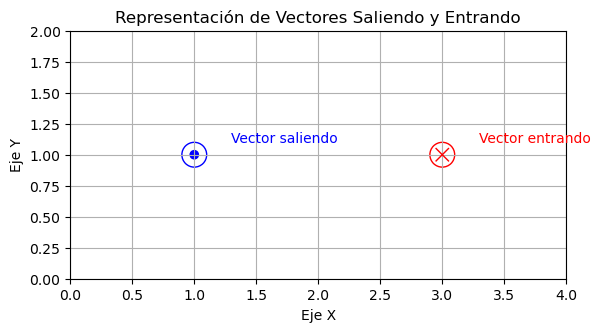

In [11]:
import matplotlib.pyplot as plt

# Coordenadas del origen del vector saliendo
origen_saliendo_x = 1
origen_saliendo_y = 1

# Coordenadas del origen del vector entrando
origen_entrando_x = 3
origen_entrando_y = 1

# Tamaño del círculo base para ambos vectores
tamano_circulo = 0.2

# Tamaño de los elementos internos
tamano_punto = tamano_circulo / 3
tamano_cruz = tamano_circulo / 2

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Dibujar el vector saliendo (círculo con punto)
circulo_saliendo = plt.Circle((origen_saliendo_x, origen_saliendo_y), radius=tamano_circulo / 2, fill=False, edgecolor='blue')
punto_saliendo = plt.Circle((origen_saliendo_x, origen_saliendo_y), radius=tamano_punto / 2, color='blue')
ax.add_patch(circulo_saliendo)
ax.add_patch(punto_saliendo)
ax.annotate('Vector saliendo', (origen_saliendo_x + 0.3, origen_saliendo_y + 0.1), color='blue')

# Dibujar el vector entrando (círculo con cruz)
circulo_entrando = plt.Circle((origen_entrando_x, origen_entrando_y), radius=tamano_circulo / 2, fill=False, edgecolor='red')

# Líneas de la cruz
linea1_entrando = plt.Line2D(
    (origen_entrando_x - tamano_cruz / 2, origen_entrando_x + tamano_cruz / 2),
    (origen_entrando_y - tamano_cruz / 2, origen_entrando_y + tamano_cruz / 2),
    color='red', linewidth=1
)
linea2_entrando = plt.Line2D(
    (origen_entrando_x - tamano_cruz / 2, origen_entrando_x + tamano_cruz / 2),
    (origen_entrando_y + tamano_cruz / 2, origen_entrando_y - tamano_cruz / 2),
    color='red', linewidth=1
)

ax.add_patch(circulo_entrando)
ax.add_line(linea1_entrando)
ax.add_line(linea2_entrando)
ax.annotate('Vector entrando', (origen_entrando_x + 0.3, origen_entrando_y + 0.1), color='red')

# Establecer límites de los ejes
ax.set_xlim(0, 4)
ax.set_ylim(0, 2)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title('Representación de Vectores Saliendo y Entrando')
ax.grid(True)

# Mostrar la gráfica
plt.show()


In [16]:
def generateRandomDataSet_2(robot, N_segments, flag_joint_move=False, flag_plot=False, flag_q_noise=False, pos_noise_std=5e-7):
    """
    Genera un dataset para entrenamiento y pruebas con ruido de medición en posición.

    Args:
        robot: Instancia del robot
        N_segments: Cantidad de puntos a visitar (fly by point). El movimiento empieza y termina con velocidad 0
        flag_joint_move: Indica si la secuencia de movimientos es joint o cartesiana
        flag_plot: Indica si se grafica la trayectoria deseada y medidas
        flag_q_noise: Indica si se agrega ruido a las posiciones articulares
        pos_noise_std: Desviación estándar del ruido de medición en posición (metros)

    Returns:
        t_ref: Vector de tiempo de referencia
        q_ref: Vector de posiciones articulares de referencia
        qd_ref: Vector de velocidades articulares de referencia
        qdd_ref: Vector de aceleraciones articulares de referencia
        POSES_ref: Vector de posiciones cartesianas de referencia (matrices A0_6)
        tau_ref: Vector de torques de referencia calculado con la dinámica directa
        pos_measured, posd_measured, posdd_measured: Variables medidas (con ruido)
        pos_real, posd_real, posdd_real: Trayectoria real ejecutada (sin ruido)
    """
    alcanceXY = robot.a[0] + robot.a[1]
    Tj = np.random.rand(N_segments,) + 0.5
    if flag_joint_move:
        q_dest = (np.random.rand(N_segments, 2) - 0.5) * 2 * np.pi
        t_ref, q_ref, qd_ref, qdd_ref, POSES_ref = robot.genTrJoint(q_dest, Tj)
    else:
        # Limito las poses destino para trabajar en 2 cuadrantes y evitar pasar por singularidades
        POSE_dest = []
        while len(POSE_dest) < N_segments:
            x_dest = np.random.uniform(0, alcanceXY)
            y_dest = np.random.uniform(-alcanceXY, alcanceXY)
            if x_dest**2 + y_dest**2 < alcanceXY**2:
                POSE_dest.append(sm.SE3(x_dest, y_dest, 0))
        t_ref, q_ref, qd_ref, qdd_ref, POSES_ref = robot.genTrCart(POSE_dest, Tj)

    # Extraigo la posición del TCP para graficar
    pos_ref = np.vstack(([pose.t[0] for pose in POSES_ref], [pose.t[1] for pose in POSES_ref])).T

    # Obtengo la velocidad cartesiana derivando numéricamente
    posd_ref = np.diff(pos_ref, axis=0) / robot.Ts
    posd_ref = np.vstack([posd_ref, np.zeros(2,)])

    # Obtengo la aceleración cartesiana derivando numéricamente
    posdd_ref = np.diff(posd_ref, axis=0) / robot.Ts
    posdd_ref = np.vstack([posdd_ref, np.zeros(2,)])

    # Trayectorias reales para las variables cartesianas (sin ruido)
    pos_real = pos_ref
    posd_real = posd_ref
    posdd_real = posdd_ref

    # Calcular torques de referencia
    tau_ref = robot.rne(q_ref, qd_ref, qdd_ref)

    # Introducir ruido a las trayectorias articulares si flag_q_noise=True
    if flag_q_noise:
        q_measured = q_ref + np.random.normal(0, pos_noise_std, q_ref.shape)
        qd_measured = np.diff(q_measured, axis=0) / robot.Ts
        qd_measured = np.vstack([qd_measured, np.zeros(2,)])
        qdd_measured = np.diff(qd_measured, axis=0) / robot.Ts
        qdd_measured = np.vstack([qdd_measured, np.zeros(2,)])
        POSES_measured = [robot.fkine(q) for q in q_measured]
        pos_measured = np.vstack(([pose.t[0] for pose in POSES_measured], [pose.t[1] for pose in POSES_measured])).T
        posd_measured = np.diff(pos_measured, axis=0) / robot.Ts
        posd_measured = np.vstack([posd_measured, np.zeros(2,)])
        posdd_measured = np.diff(posd_measured, axis=0) / robot.Ts
        posdd_measured = np.vstack([posdd_measured, np.zeros(2,)])

    else:
        q_measured, qd_measured, qdd_measured = q_ref, qd_ref, qdd_ref

    # Calcular torques medidos
    tau_measured = robot.rne(q_measured, qd_measured, qdd_measured)

    # Calculo con el PDI el torque para hacer esa trayectoria
    tau_ref = robot.rne(q_ref, qd_ref, qdd_ref)

    if flag_plot:
        # Graficar trayectorias deseadas vs medidas
        plt.figure(figsize=(12, 12))
        
        # Posición
        plt.subplot(3, 1, 1)
        plt.plot(t_ref, pos_ref[:, 0], label="Deseada (x)",linewidth=1.5)
        plt.plot(t_ref, pos_measured[:, 0], label="Medida (x)", linestyle="-")
        plt.plot(t_ref, pos_ref[:, 1], label="Deseada (y)",linewidth=1.5)
        plt.plot(t_ref, pos_measured[:, 1], label="Medida (y)", linestyle="-")
        plt.legend(); plt.ylabel("Posición (m)"); plt.title("Posiciones Deseadas vs Medidas")

        # Velocidad
        plt.subplot(3, 1, 2)
        plt.plot(t_ref, posd_ref[:, 0], label="Deseada (vx)",linewidth=1.5)
        plt.plot(t_ref, posd_measured[:, 0], label="Medida (vx)", linestyle="-")
        plt.plot(t_ref, posd_ref[:, 1], label="Deseada (vy)",linewidth=1.5)
        plt.plot(t_ref, posd_measured[:, 1], label="Medida (vy)", linestyle="-")
        plt.legend(); plt.ylabel("Velocidad (m/s)"); plt.title("Velocidades Deseadas vs Medidas")

        # Aceleración
        plt.subplot(3, 1, 3)
        plt.plot(t_ref, posdd_ref[:, 0], label="Deseada (ax)",linewidth=1.5)
        plt.plot(t_ref, posdd_measured[:, 0], label="Medida (ax)", linestyle="--")
        plt.plot(t_ref, posdd_ref[:, 1], label="Deseada (ay)",linewidth=1.5)
        plt.plot(t_ref, posdd_measured[:, 1], label="Medida (ay)", linestyle="--")
        plt.legend(); plt.xlabel("Tiempo (s)"); plt.ylabel("Aceleración (m/s²)"); plt.title("Aceleraciones Deseadas vs Medidas")
        
        plt.tight_layout()
        plt.show()

        # Comparar trayectorias deseada, real y medida
        fig, ax = plt.subplots(figsize=(8, 8))
        plt.plot(pos_ref[:, 0], pos_ref[:, 1], label="Trayectoria Deseada", linewidth=2)
        #plt.plot(pos_real[:, 0], pos_real[:, 1], label="Trayectoria Real", linestyle="--", linewidth=2)
        plt.plot(pos_measured[:, 0], pos_measured[:, 1], label="Trayectoria Medida", linestyle="-.", linewidth=2)
        circle = Circle((0, 0), alcanceXY, edgecolor='b', facecolor='none', linestyle='--', linewidth=1)
        ax.add_patch(circle)
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.title('Comparación de Trayectorias')
        plt.legend()
        plt.axis('equal')
        plt.grid()
        plt.show()

        plt.figure(figsize=(12, 12))

        # Posición articular
        plt.subplot(5, 1, 1)
        plt.plot(t_ref, q_ref[:, 0], label="q1 (Deseada)", linewidth=1.5)
        plt.plot(t_ref, q_measured[:, 0], label="q1 (Medida)", linestyle="--", linewidth=1.5)
        plt.plot(t_ref, q_ref[:, 1], label="q2 (Deseada)", linewidth=1.5)
        plt.plot(t_ref, q_measured[:, 1], label="q2 (Medida)", linestyle="--", linewidth=1.5)
        plt.legend()
        plt.ylabel("Posición (rad)")
        plt.title("Posiciones Articulares")

        # Velocidad articular
        plt.subplot(5, 1, 2)
        plt.plot(t_ref, qd_ref[:, 0], label="qd1 (Deseada)", linewidth=1.5)
        plt.plot(t_ref, qd_measured[:, 0], label="qd1 (Medida)", linestyle="--", linewidth=1.5)
        plt.plot(t_ref, qd_ref[:, 1], label="qd2 (Deseada)", linewidth=1.5)
        plt.plot(t_ref, qd_measured[:, 1], label="qd2 (Medida)", linestyle="--", linewidth=1.5)
        plt.legend()
        plt.ylabel("Velocidad (rad/s)")
        plt.title("Velocidades Articulares")

        # Aceleración articular
        plt.subplot(5, 1, 3)
        plt.plot(t_ref, qdd_ref[:, 0], label="qdd1 (Deseada)", linewidth=1.5)
        plt.plot(t_ref, qdd_measured[:, 0], label="qdd1 (Medida)", linestyle="--", linewidth=1.5)
        plt.plot(t_ref, qdd_ref[:, 1], label="qdd2 (Deseada)", linewidth=1.5)
        plt.plot(t_ref, qdd_measured[:, 1], label="qdd2 (Medida)", linestyle="--", linewidth=1.5)
        plt.legend()
        plt.ylabel("Aceleración (rad/s²)")
        plt.title("Aceleraciones Articulares")

        # Torque
        plt.subplot(5, 1, 4)
        plt.plot(t_ref, tau_ref[:, 0], label="tau1 (Deseada)", linewidth=1.5)
        plt.plot(t_ref, tau_measured[:, 0], label="tau1 (Medida)", linestyle="--", linewidth=1.5)
        plt.plot(t_ref, tau_ref[:, 1], label="tau2 (Deseada)", linewidth=1.5)
        plt.plot(t_ref, tau_measured[:, 1], label="tau2 (Medida)", linestyle="--", linewidth=1.5)
        plt.legend()
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Torque (Nm)")
        plt.title("Torques Articulares")

        # Error en posición cartesiana
        pos_measured = np.vstack(([pose.t[0] for pose in [robot.fkine(q) for q in q_measured]], 
                                  [pose.t[1] for pose in [robot.fkine(q) for q in q_measured]])).T
        error_pos = np.linalg.norm(pos_ref - pos_measured, axis=1)
        plt.subplot(5, 1, 5)
        plt.plot(t_ref, error_pos, label="Error Posición Cartesiana", color="r", linewidth=1.5)
        plt.legend()
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Error (m)")
        plt.title("Error de Posición Cartesiana")

        plt.show()

    return (t_ref, q_ref, qd_ref, qdd_ref, POSES_ref, tau_ref, 
            pos_measured, posd_measured, posdd_measured, 
            pos_real, posd_real, posdd_real)
